##Foundational Concepts of Exploratory Data Analysis

###Historical Context and Theoretical Underpinnings
Developed by John Tukey in the 1970s, EDA emerged as a response to the growing need for robust data examination techniques in an era of increasing computational power. **Unlike confirmatory analysis that tests predefined hypotheses, EDA adopts an open-ended approach that encourages data-driven hypothesis generation through visual and quantitative exploration.** This paradigm shift revolutionized statistical practice by emphasizing pattern recognition over rigid methodological constraints.

###key objective and business impact

Modern EDA implementations serve multiple critical functions in analytical workflows. Primary objectives include data:

* quality assessment through outlier detection,
* relationship identification between variables
* distribution analysis to inform modeling choices.

## Types of EDA:

### Univariate Analysis

Univariate analysis focuses on analyzing one variable at a time. It describes the distribution, central tendency, and spread of data for that variable.

####Methods for Univariate Analysis

  1. **Descriptive Statistics:**
  Calculate measures like mean, median, mode, standard deviation, variance, quartiles, range, and count to summarize the variable's key features.
  2. **Frequency Tables:**
  For categorical variables, create tables showing the frequency or percentage of each category.
  3. **Visualizations:**
  Use plots like histograms, box plots, density plots, and bar charts to visualize the distribution of the variable.

#### Univariate Analysis for different data types

  1. **Numerical Data:**
    * Histograms: Show the frequency distribution of the data.
    * Box Plots: Display the median, quartiles, and outliers.
    * Density Plots: Visualize the probability density function of the data.
    * Summary Statistics: Provide a concise overview of central tendency and dispersion.

  2. **Categorical Data:**
    * Bar Charts: Show the frequency or percentage of each category.
    * Pie Charts: Display the proportion of each category relative to the whole.
    * Frequency Tables: Summarize the counts and percentages of each category.

--------------------------
1. Numerical Univariate Analysis (e.g., Age)
--------------------------
Descriptive Statistics for 'Age':
count    10.000000
mean     30.300000
std       5.417051
min      22.000000
25%      27.250000
50%      29.500000
75%      34.000000
max      40.000000
Name: Age, dtype: float64
Mode: 22
Variance: 29.34
Standard Deviation: 5.42
Range: 18


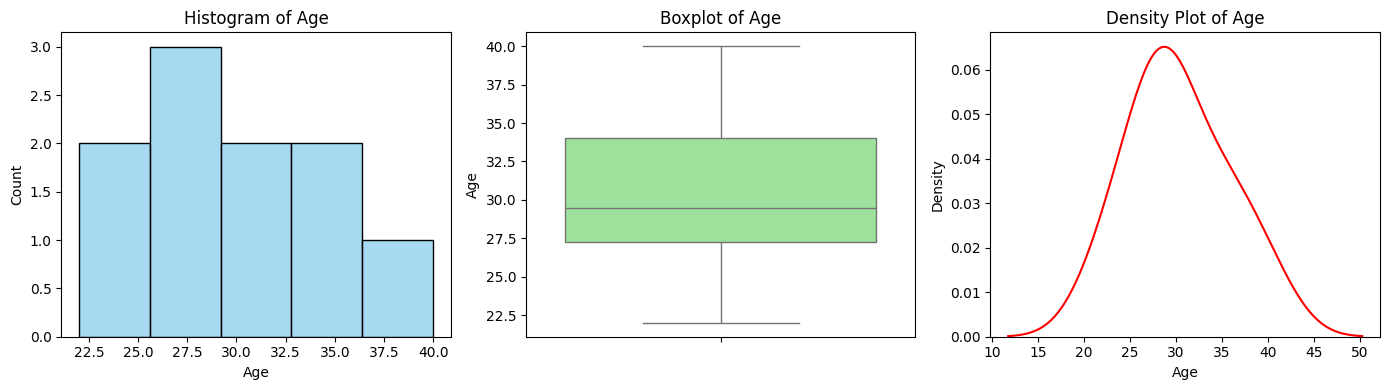

--------------------------
2. Categorical Univariate Analysis (e.g., Gender)
--------------------------

Frequency Table for 'Gender':
        Count  Percentage
Gender                   
Male        5        50.0
Female      5        50.0


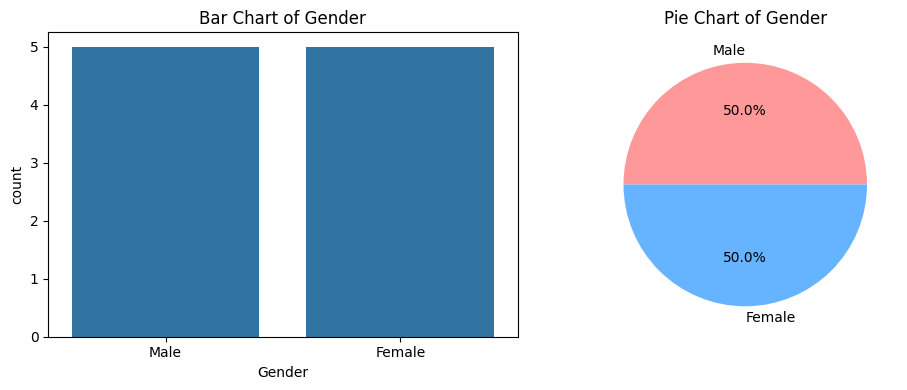

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Age': [25, 30, 22, 35, 28, 40, 36, 29, 31, 27],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male']
}
df = pd.DataFrame(data)

print('--------------------------')
print('1. Numerical Univariate Analysis (e.g., Age)')
print('--------------------------')

print("Descriptive Statistics for 'Age':")
print(df['Age'].describe())
print(f"Mode: {df['Age'].mode()[0]}")
print(f"Variance: {df['Age'].var():.2f}")
print(f"Standard Deviation: {df['Age'].std():.2f}")
print(f"Range: {df['Age'].max() - df['Age'].min()}")

# Visualizations
plt.figure(figsize=(14, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=False, bins=5, color='skyblue')
plt.title('Histogram of Age')

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Age'], color='lightgreen')
plt.title('Boxplot of Age')

# Density plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['Age'], color='red')
plt.title('Density Plot of Age')

plt.tight_layout()
plt.show()

print('--------------------------')
print('2. Categorical Univariate Analysis (e.g., Gender)')
print('--------------------------')

print("\nFrequency Table for 'Gender':")
gender_counts = df['Gender'].value_counts()
gender_percent = df['Gender'].value_counts(normalize=True) * 100
freq_table = pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percent.round(2)})
print(freq_table)

# Visualizations
plt.figure(figsize=(10, 4))

# Bar chart
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Bar Chart of Gender')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart of Gender')

plt.tight_layout()
plt.show()


### Bivariate Analysis

**Bivariate analysis** examines relationships between two variables, enabling researchers to identify correlations, causal links, and predictive patterns.

#### Data Types and Methodologies

1. Numerical-Numerical

  - **Scatter Plots**: Visualize linear/non-linear relationships, such as the positive correlation between study hours and exam scores.
  - **Correlation Coefficients**:
    - *Pearson’s r* quantifies linear association strength.
    - Example: A value of **0.89** between advertising spend and sales indicates a strong positive relationship.
  - **Regression Analysis**:
    - *Simple linear regression* models predict outcomes (e.g., house prices) from predictors (e.g., square footage).

2. Categorical-Categorical

  - **Contingency Tables**:
    - Cross-tabulations reveal interactions, such as gender-based voting preferences in election data.
  - **Chi-Square Tests**:
    - Assess independence between categorical variables.
    - Example: A significant p-value in drug efficacy vs. placebo data implies treatment effectiveness.

3. Numerical-Categorical

  - **T-tests / ANOVA**:
    - Compare means across groups.
    - Example: ANOVA might reveal significant differences in plant growth under varying fertilizer types.


--------------------------
1. Numerical- Numerical Bivariate Analysis
--------------------------
Scatter plot


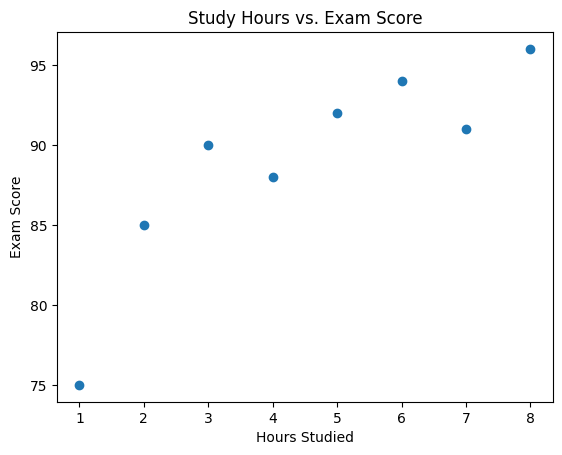

--------------------------
Correlation coefficient
Pearson Correlation: 0.858
--------------------------
Linear regression
Slope: 2.30, Intercept: 78.54


In [10]:
# Create DataFrame
data = {'hours': [1, 2, 3, 4, 5, 6, 7, 8],
        'score': [75, 85, 90, 88, 92, 94, 91, 96]}
df = pd.DataFrame(data)


print('--------------------------')
print('1. Numerical- Numerical Bivariate Analysis')
print('--------------------------')

print('Scatter plot')
plt.scatter(df['hours'], df['score'])
plt.title('Study Hours vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

print('--------------------------')
print('Correlation coefficient')
correlation = df.corr().loc['hours', 'score']
print(f'Pearson Correlation: {correlation:.3f}')

print('--------------------------')
print('Linear regression')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['hours']], df['score'])
print(f'Slope: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}')


In [12]:
print('--------------------------')
print('Categorical-Categorical Analysis Implementation')
print('--------------------------')

import pandas as pd
from scipy.stats import chi2_contingency

print('Example 1: Gender vs Voting Preference')
# Create sample data
vote_data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'Vote': ['Party A', 'Party B', 'Party A', 'Party B', 'Party A', 'Party B', 'Party A', 'Party B']
})

print('--------------------------')
print('Create contingency table')
contingency_table = pd.crosstab(vote_data['Gender'], vote_data['Vote'])
print(contingency_table)

print('--------------------------')
print('Perform Chi-Square Test of Independence')
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")


--------------------------
Categorical-Categorical Analysis Implementation
--------------------------
Example 1: Gender vs Voting Preference
--------------------------
Create contingency table
Vote    Party A  Party B
Gender                  
Female        2        2
Male          2        2
--------------------------
Perform Chi-Square Test of Independence

Chi-Square Statistic: 0.00
P-value: 1.0000


### Multivariate Analysis

Multivariate techniques analyze three or more variables simultaneously, addressing complex interdependencies in high-dimensional data.

#### Data Types and Methodologies

1. Numerical Data

  - **Multiple Regression**: Predicts a dependent variable using multiple predictors.  
    *Example*: A real estate model might incorporate square footage, bedroom count, and location to estimate prices.

  - **Principal Component Analysis (PCA)**: Reduces dimensionality while preserving variance.  
    *Example*: PCA applied to genomic data might isolate key biomarkers from thousands of genes.

2. Mixed Data Types

  - **MANOVA (Multivariate Analysis of Variance)**: Tests mean differences across groups for multiple dependent variables.  
    *Example*: A psychology study could compare cognitive test scores and stress levels across therapy types.

  - **Cluster Analysis**: Groups similar observations using metrics like Euclidean distance.  
    *Example*: Customer segmentation might combine purchase history, demographics, and survey responses.


In [17]:
# This code reduces four-dimensional iris data to two principal components, visualized via a scatter plot colored by species

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load and preprocess data
iris = px.data.iris()
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Visualize
fig = px.scatter(components, x=0, y=1, color=iris['species'],
                 labels={'0': 'PC1', '1': 'PC2'},
                 title='PCA of Iris Dataset')
fig.show()


### Example of Systematic procedure of EDA

--2025-04-25 10:40:12--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-04-25 10:40:12 (4.19 MB/s) - ‘titanic.csv.1’ saved [60302/60302]

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object

<ipython-input-4-cd9e70fe7e1f>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-cd9e70fe7e1f>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

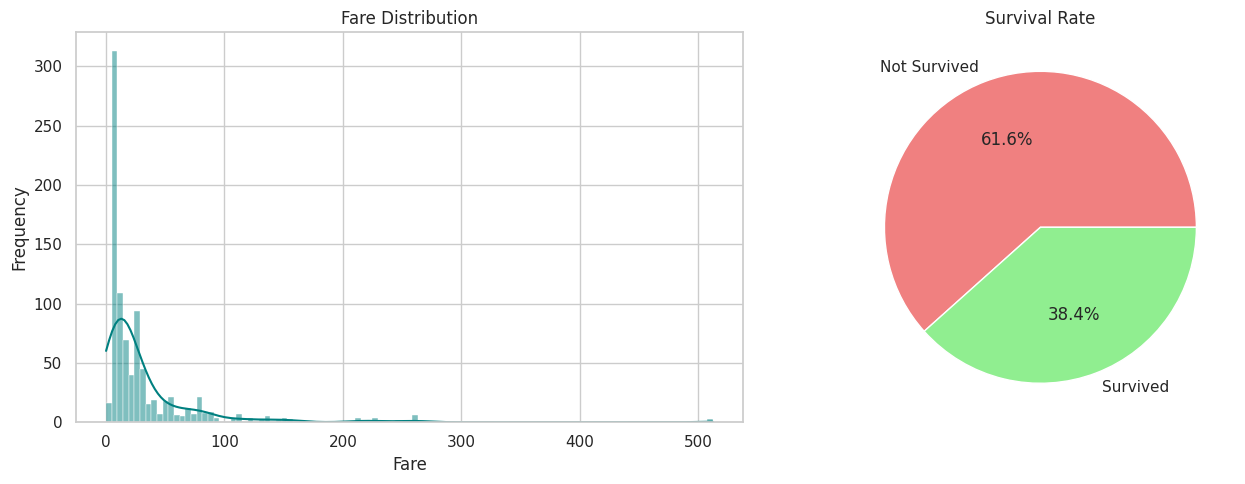

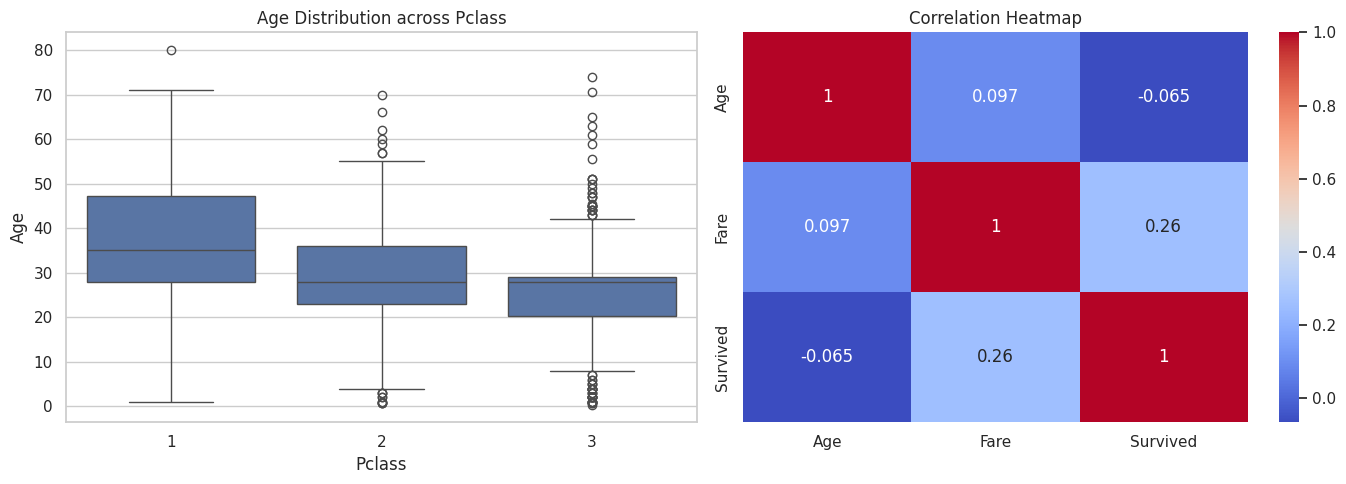

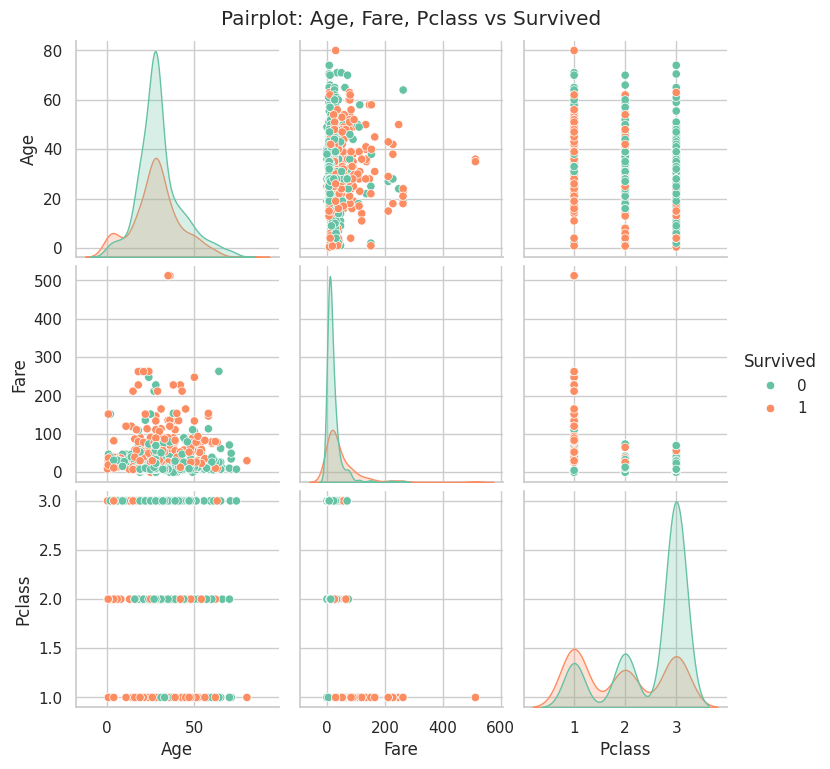

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style for plots
sns.set(style='whitegrid')

# Download the titanic dataset
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

# Load dataset
df = pd.read_csv('titanic.csv')

# Initial inspection
print("Dataset Info:\n")
print(df.info())

print("\nDataset Description:\n")
print(df.describe(include='all'))

# data imputation (Data imputation is a technique used to replace missing data with estimated values, allowing for more complete datasets and preventing bias in analysis)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# =============================
# Univariate Analysis
# =============================
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Fare Distribution
sns.histplot(df['Fare'], kde=True, ax=axs[0], color='teal')
axs[0].set_title('Fare Distribution')
axs[0].set_xlabel('Fare')
axs[0].set_ylabel('Frequency')

# Survival Count (Pie Chart)
df['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Not Survived', 'Survived'],
    colors=['lightcoral', 'lightgreen'],
    ax=axs[1]
)
axs[1].set_ylabel('')
axs[1].set_title('Survival Rate')

plt.tight_layout()
plt.show()

# =============================
# Bivariate Analysis
# =============================
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=df, ax=axs[0])
axs[0].set_title('Age Distribution across Pclass')

# Correlation Heatmap
corr = df[['Age', 'Fare', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# =============================
# Multivariate Analysis
# =============================
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived', palette='Set2')
plt.suptitle('Pairplot: Age, Fare, Pclass vs Survived', y=1.02)
plt.show()
